<a href="https://colab.research.google.com/github/zhirongwang94/CS-35L/blob/master/ShangXiaoYun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coloring Images

This has to be done on Google Chrome

In [ ]:
import sys
sys.path.append('github_notes')

In [ ]:
!git clone https://github.com/Mjrovai/Python4DS.git

Cloning into 'Python4DS'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 1949 (delta 19), reused 0 (delta 0), pack-reused 1905
Receiving objects: 100% (1949/1949), 781.58 MiB | 22.91 MiB/s, done.
Resolving deltas: 100% (607/607), done.
Checking out files: 100% (306/306), done.


In [ ]:
! ls

Python4DS  sample_data	yizi.png


In [ ]:
! mv ./Python4DS/Photo_Video_Colorization/* ./

In [ ]:
! ls -ltr

total 10896
drwxr-xr-x  1 root root    4096 Jul 30 16:30 sample_data
-rw-r--r--  1 root root  155500 Aug 11 08:09 yizi.png
-rw-r--r--  1 root root  649880 Aug 11 08:13 B_W_Photo_Colorization.ipynb
-rw-r--r--  1 root root   10249 Aug 11 08:13 B_W_Video_Colorization.ipynb
-rw-r--r--  1 root root  506639 Aug 11 08:13 B_W_Photo_Colorization_function.ipynb
-rw-r--r--  1 root root     322 Aug 11 08:13 Readme.md
-rw-r--r--  1 root root 8866382 Aug 11 08:13 Paper_Colorization.pdf
-rw-r--r--  1 root root  327430 Aug 11 08:13 cnn_model.png
-rw-r--r--  1 root root  236270 Aug 11 08:13 cnn_training.png
drwxr-xr-x  2 root root    4096 Aug 11 08:13 colorized_images
-rw-r--r--  1 root root  349265 Aug 11 08:13 darwin_in_rio.png
drwxr-xr-x  2 root root    4096 Aug 11 08:13 input_images
drwxr-xr-x  2 root root    4096 Aug 11 08:13 input_video
drwxr-xr-x  2 root root    4096 Aug 11 08:13 model
-rw-r--r--  1 root root   13943 Aug 11 08:13 lab_soldiers.png
drwxr-xr-x 24 root root    4096 Aug 11 08:13 Pyth

In [ ]:
! rm -r ./Python4DS/

In [ ]:
! ls -ltr

total 10892
drwxr-xr-x 1 root root    4096 Jul 30 16:30 sample_data
-rw-r--r-- 1 root root  155500 Aug 11 08:09 yizi.png
-rw-r--r-- 1 root root  649880 Aug 11 08:13 B_W_Photo_Colorization.ipynb
-rw-r--r-- 1 root root   10249 Aug 11 08:13 B_W_Video_Colorization.ipynb
-rw-r--r-- 1 root root  506639 Aug 11 08:13 B_W_Photo_Colorization_function.ipynb
-rw-r--r-- 1 root root     322 Aug 11 08:13 Readme.md
-rw-r--r-- 1 root root 8866382 Aug 11 08:13 Paper_Colorization.pdf
-rw-r--r-- 1 root root  327430 Aug 11 08:13 cnn_model.png
-rw-r--r-- 1 root root  236270 Aug 11 08:13 cnn_training.png
drwxr-xr-x 2 root root    4096 Aug 11 08:13 colorized_images
-rw-r--r-- 1 root root  349265 Aug 11 08:13 darwin_in_rio.png
drwxr-xr-x 2 root root    4096 Aug 11 08:13 input_images
drwxr-xr-x 2 root root    4096 Aug 11 08:13 input_video
drwxr-xr-x 2 root root    4096 Aug 11 08:13 model
-rw-r--r-- 1 root root   13943 Aug 11 08:13 lab_soldiers.png


In [ ]:
! wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel -O ./model/colorization_release_v2.caffemodel
! wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2_norebal.caffemodel -O ./model/colorization_release_v2_norebal.caffemodel
! wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel -O ./model/colorization_release_v1.caffemodel


In [ ]:
! cp yizi.png ./input_images/yizi.png

In [ ]:
! ls input_images/

abe.jpg		      darwin_in_rio_de_janeiro.jpg  soldiers_1941.jpg
audrey.jpg	      Einstein_1939.jpg		    tattoo_1930.jpg
bolso_joelho.png      Hindenburg_1937.jpg	    tesla_1883.jpg
burrico_14-bis_2.jpg  hitler_1930.jpg		    yizi.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

##IMAGE = "soldiers_1941.jpg"
##IMAGE = "bolso_joelho.png"
IMAGE = "yizi.png"
prototxt = "./model/colorization_deploy_v2.prototxt"
model = "./model/colorization_release_v2.caffemodel"
points = "./model/pts_in_hull.npy"
image =  "./input_images/"+IMAGE

net = cv2.dnn.readNetFromCaffe(prototxt, model)
pts = np.load(points)

class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]


In [ ]:
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)


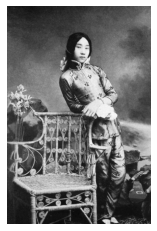

In [ ]:
plt.imshow(image)
plt.axis('off');

In [ ]:
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)
resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

In [ ]:
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

In [ ]:
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


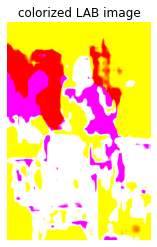

In [ ]:
plt.imshow(colorized)
plt.axis('off');
plt.title('colorized LAB image');

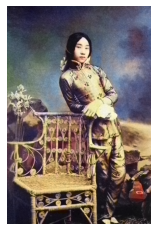

In [ ]:
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")
plt.imshow(colorized)
plt.axis('off');

In [ ]:
cv2.imwrite("./colorized_images/Color_"+IMAGE, cv2.cvtColor(colorized, cv2.COLOR_RGB2BGR))

True

In [ ]:
! ls -ltr colorized_images/


total 3272
-rw-r--r-- 1 root root  215987 Aug 11 08:13 Color_Einstein_1939.jpg
-rw-r--r-- 1 root root  104899 Aug 11 08:13 Color_Hindenburg_1937.jpg
-rw-r--r-- 1 root root  168228 Aug 11 08:13 Color_abe.jpg
-rw-r--r-- 1 root root  177181 Aug 11 08:13 Color_audrey.jpg
-rw-r--r-- 1 root root  138909 Aug 11 08:13 Color_burrico_14-bis_2.jpg
-rw-r--r-- 1 root root   73257 Aug 11 08:13 Color_darwin_in_rio_de_janeiro.jpg
-rw-r--r-- 1 root root  153184 Aug 11 08:13 Color_hitler_1930.jpg
-rw-r--r-- 1 root root  224064 Aug 11 08:13 Color_soldiers_1941.jpg
-rw-r--r-- 1 root root  192923 Aug 11 08:13 Color_tattoo_1930.jpg
-rw-r--r-- 1 root root  231800 Aug 11 08:13 Color_tesla_1883.jpg
-rw-r--r-- 1 root root 1648271 Aug 11 08:28 Color_yizi.png


In [ ]:
! cp ./colorized_images/Color_yizi.png Color_yizi.png

In [ ]:
! ls -ltr

total 12504
drwxr-xr-x 1 root root    4096 Jul 30 16:30 sample_data
-rw-r--r-- 1 root root  155500 Aug 11 08:09 yizi.png
-rw-r--r-- 1 root root  649880 Aug 11 08:13 B_W_Photo_Colorization.ipynb
-rw-r--r-- 1 root root   10249 Aug 11 08:13 B_W_Video_Colorization.ipynb
-rw-r--r-- 1 root root  506639 Aug 11 08:13 B_W_Photo_Colorization_function.ipynb
-rw-r--r-- 1 root root     322 Aug 11 08:13 Readme.md
-rw-r--r-- 1 root root 8866382 Aug 11 08:13 Paper_Colorization.pdf
-rw-r--r-- 1 root root  327430 Aug 11 08:13 cnn_model.png
-rw-r--r-- 1 root root  236270 Aug 11 08:13 cnn_training.png
-rw-r--r-- 1 root root  349265 Aug 11 08:13 darwin_in_rio.png
drwxr-xr-x 2 root root    4096 Aug 11 08:13 input_video
-rw-r--r-- 1 root root   13943 Aug 11 08:13 lab_soldiers.png
drwxr-xr-x 2 root root    4096 Aug 11 08:17 model
drwxr-xr-x 2 root root    4096 Aug 11 08:23 input_images
drwxr-xr-x 2 root root    4096 Aug 11 08:28 colorized_images
-rw-r--r-- 1 root root 1648271 Aug 11 08:29 Color_yizi.png


In [66]:
from google.colab import files
files.download('Color_yizi.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>